# __Preprocesamiento - Limpieza de datos__

Este Notebook contiene algunos de los principios básicos sobre limpieza de datos. Es importante aclarar que este Notebook no presenta una revisión exhaustiva sobre los temas mencionados. Su objetivo es presentar los conceptos necesarios para realizar un preprocesamiento inicial de un conjunto de datos. Este proceso puede realizarse en 4 etapas


*   Identificar elementos faltantes
*   Identificar elementos invalidos (outliers)
*   Identificar datos duplicados o irrelevantes
*   Problemas de formato (mayúsculas, tipos de datos, etc.)

Es importante realizar una buena documentación sobre el proceso de limpieza de datos. Si se encuentra que ocurrió algún error en una etapa posterior, esto facilitará encontrar la solución




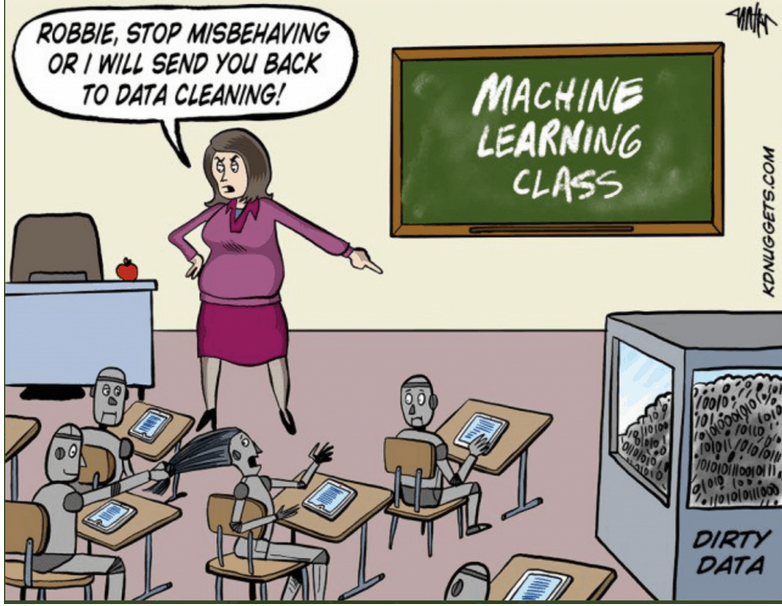

In [ ]:
import numpy as np
import pandas as pd

## __Datos faltantes__

¿Qué significa tener "datos faltantes"? o ¿Qué es un "valor" faltante? para responder estas preguntas se debe considerar el origen de los datos y el contexto del problema. Por ejemplo, para una encuesta, un campo Salario con un valor vacío, un número $0$ o un valor no válido (una cadena, por ejemplo) se puede considerar como "datos faltantes". Estos conceptos están relacionados con los valores que Python considerará `"Falsy"`: 

In [ ]:
falsy_values = (0, False, None, '', [], {})

In [ ]:
print(bool([]))

False


Para Python, todos los valores anteriores se consideran con un valor de verdad "falso": 

In [ ]:
print('0 -> boolean:', bool(0))
print('None -> boolean:', bool(None))
print("'' -> boolean:", bool(''))
print('[] -> boolean:', bool([]))
print('{} -> boolean:', bool([]))


0 -> boolean: False
None -> boolean: False
'' -> boolean: False
[] -> boolean: False
{} -> boolean: False


La función `any` se puede aplicar a objetos iterables y equivale a operar todos los elementos de arreglo un el operador lógico `or`

In [ ]:
a = [False, False, False]
print('Cocatenando con or: ', a[0] or a[1] or a[2])
print('Utilizando el método any:', any(a))

Cocatenando con or:  False
Utilizando el método any: False


La contraparte del método `any` es el método `all`.  Esta también se aplica a objetos iterables y equivale a operar todos los elementos de arreglo un el operador lógico `and`

In [ ]:
a = [True, True, True]
print('Cocatenando con and: ', a[0] and a[1] and a[2])
print('Utilizando el método all:', all(a))

Cocatenando con and:  False
Utilizando el método all: False


Ahora verifiquemos los valores que definimos como `Falsy` con el método `any`

In [ ]:
falsy_values = (0, False, None, '', [], {})
any(falsy_values)

True

## __En NumPy__

NumPy tiene un valor "vacio" especial para números  llamado `np.nan`. Es `NaN`: "*Not a Number*" 

In [ ]:
np.nan

nan

El valor de `np.nan` puede considerarse una especie de virus; todo lo que toca se convierte en `np.nan`: 

In [ ]:
3 + np.nan

nan

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
a.sum()

nan

In [ ]:
a.mean()

nan

Un valor `np.nan` es una mejor alternativa que los valores  de tipo `None`. En los ejemplos anteriores este valor habría generado una excepción: 

In [ ]:
 3 + None

TypeError: ignored

En un arrreglo de NumPy los valores de tipo `None` serán reemplazados por `np.nan`: 

In [ ]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')
a

NameError: ignored

Como se mencionó, `np.nan` es como un virus; si existe un valor `nan` en un areglo e intenta realizar una operación obtendrá un valor `nan` como resultado: 

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
a.mean()

nan

In [ ]:
a.sum()

nan

NumPy también admite un tipo "`infinite`": 

In [ ]:
np.inf

inf

También se comporta como un virus...

In [ ]:
np.inf / 3

inf

In [ ]:
np.inf / np.inf

nan

In [ ]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float_)
b.sum()

nan

### __Identificando valores de tipo `NaN` y `inf`__

Hay dos funciones: `np.isnan` y `np.isinf` que permiten verificar la presencia de `nan` y `inf` en un conjunto de datos.

In [ ]:
np.isnan(np.nan)

True

In [ ]:
np.isinf(np.inf)

True

Y la operación inversa se puede realizar con `np.isfinite. `

In [ ]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

`np.isnan` y` np.isinf` también pueden tomar arreglos como entradas y devuelven arreglos booleanos como resultado: 

In [ ]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [ ]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [ ]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

_Nota: No es tan común encontrar valores infinitos en un dataset._

### __Filtrando `NaN` y `inf`__
Siempre que intentemos realizar una operación con un arreglo de Numpy y exista la posibilidad de tener valores faltantes, es necesario filtrarlos antes de continuar. Esto permitirá evitar la propagación de los valores `nan`. En este caso, usaremos una combinación de `np.isnan + arreglos booleanos`

In [ ]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [ ]:
np.isnan(a).sum()

2

In [ ]:
~np.isnan(a)

array([ True,  True,  True, False, False,  True])

In [ ]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

Esto es equivalente a:

In [ ]:
np.isfinite(a)

array([ True,  True,  True, False, False,  True])

In [ ]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

Y con este resultado, es posible realizar diferentes operaciones: 

In [ ]:
a[np.isfinite(a)].sum()

10.0

In [ ]:
a[np.isfinite(a)].mean()

2.5

## __En Pandas__

Pandas toma prestadas todas las capacidades de NumPy y adicionalmente agrega una serie de métodos bastante útiles para manejar datos faltantes. 

### __Identificando datos faltantes__
De manera similar a `NumPy`, `Pandas`  tiene algunas funciones que son de utilidad para identificar y detectar valores nulos: 


In [ ]:
pd.isnull(np.nan)

True

In [ ]:
pd.isnull(None)

True

In [ ]:
pd.isna(np.nan)

True

In [ ]:
pd.isna(None)

True

También existen los opuestos:

In [ ]:
pd.notnull(3)

True

In [ ]:
pd.notnull(None)

False

In [ ]:
pd.notna(np.nan)

False

In [ ]:
pd.notna(4)

True

Ambos métodos funcionan con `Series` y `DataFrame`: 

In [ ]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [ ]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [ ]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### __Operaciones con datos faltantes__

Pandas maneja los valores faltantes de una manera más amigable que NumPy; `nan` ya no se comportarán como un "virus" y las operaciones simplemente los ignorarán por completo: 

In [ ]:
pd.Series([1, 2, np.nan]).count()

2

In [ ]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [ ]:
pd.Series([2, 2, np.nan]).mean()

2.0

### __Filtrando `nan` y `inf`__

Al igual que en NumPy podemos usar la combinación de `np.isnan + arreglos booleanos` para filtrar esos valores nan y nulos: 

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.notnull(s).sum()

4

In [ ]:
pd.isnull(s).sum()

2

In [ ]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

Ambos `notnull` como` isnull` funcionan en `Series` y en` DataFrame's` por lo que es posible usarlos sin inconveniente

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [ ]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
df = pd.DataFrame({'A':[1, 2, 3, np.nan, None],'B':[4, None, 5, np.nan, 6] })
df

,A,B
0,1.0,4.0
1,2.0,NaN
2,3.0,5.0
3,NaN,NaN
4,NaN,6.0


In [ ]:
df.notnull()

,A,B
0,True,True
1,True,False
2,True,True
3,False,False
4,False,True


In [ ]:
df.isnull()

,A,B
0,False,False
1,False,True
2,False,False
3,True,True
4,True,False


In [ ]:
df.isna().sum()

A    2
B    2
dtype: int64

### __Eliminando valores `NaN`__

Los arreglos booleanos + notnull () pueden convertir el proceso de verificar valores `NaN`  en una tarea repetitiva. Lo bueno es que siempre que tengamos una tarea repetitiva probablemente exista una manera más eficiente de realizarla. En este caso, podemos usar el método `dropna`: 

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [ ]:
df.shape

(4, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [ ]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [ ]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

El comportamiento predeterminado de `dropna` __eliminará todas las filas en las que exista valor nulo__

In [ ]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


Las filas que contienen valores nulos se eliminan del Dataframe. También puede utilizar el parámetro `axis` para eliminar columnas que contienen valores nulos: 

In [ ]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.dropna(axis='columns')  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


Este proceso eliminará cualquier fila o columna que contenga  __al menos__ un valor nulo. Esto puede resultar peligroso para el dataset. Podemos controlar este comportamiento con el parámetro `"how"`. Puede tomar los valores r `"any"` o `"all"`. El método `any` eliminará la columna (o la fila) siempre que haya al menos un valor tipo `nan`. El métdodo `all` eliminará la columna si todos los valores son `nan`

In [ ]:
df2 = pd.DataFrame({
    'Column A': [1, 3, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100],
    'Column D': [np.nan, np.nan, np.nan]
})
df2

,Column A,Column B,Column C,Column D
0,1,2.0,NaN,NaN
1,3,NaN,NaN,NaN
2,30,31.0,100.0,NaN


In [ ]:
df2.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1,2.0,NaN,NaN
1,3,NaN,NaN,NaN
2,30,31.0,100.0,NaN


In [ ]:
df2.dropna(how='all', axis='columns')

,Column A,Column B,Column C
0,1,2.0,NaN
1,3,NaN,NaN
2,30,31.0,100.0


In [ ]:
df2.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D


También es posible utilizar el parámetro `thresh` para indicar un _threshold_ (un número mínimo) de valores no nulos (validos) para evitar ser eliminada. 

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, np.nan, np.nan],
    'Column B': [2, np.nan, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, np.nan],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5.0
1,NaN,NaN,9.0,8.0
2,NaN,31.0,32.0,34.0
3,NaN,NaN,100.0,NaN


In [ ]:
df.dropna(thresh=2)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5.0
1,NaN,NaN,9.0,8.0
2,NaN,31.0,32.0,34.0


In [ ]:
df.dropna(thresh=3, axis='columns')

,Column C,Column D
0,NaN,5.0
1,9.0,8.0
2,32.0,34.0
3,100.0,NaN


Podemos utilizar este parámetro para garantizar mantener un porcentaje de datos validos

In [ ]:
limit = int(df.shape[0] * .75)
limit

3

En este caso mantendremos las filas que tengan el 75% de sus valores validos

In [ ]:
df.dropna(thresh=limit)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5.0
2,NaN,31.0,32.0,34.0


### __Remplanzando valores `NaN`__

Algunas veces, en lugar de eliminar los valores nulos podemos reemplazarlos con otros valores. Esto dependerá del contexto del problema y del conjunto de datos que se estén trabajando.En ocasiones, un valor `nan` se puede reemplazar con un `0`, o se puede reemplazar con la "`media`" de los datos. Otras veces se puede tomar el valor más cercano. Sin embargo, esto dependerá del contexto del problema. A continuación se presentan diferentes alternativas

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Remplazando con un valor arbitrario

In [ ]:
s.fillna(100)

0      1.0
1      2.0
2      3.0
3    100.0
4    100.0
5      4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [ ]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Para llenar con valores contiguos utilizamos el atributo `method`. El valor `'ffil'` progaga la última observación valida.


 

In [ ]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

El valor `'bfil'` progaga la siguiente observación valida

In [ ]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

Sin embargo, estos métodos pueden dejar valores nulos en los extremos de la Series o el DataFrame: 

In [ ]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [ ]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64


El método `fillna` también funciona en DataFrames. Las principales diferencias son que puede especificar el eje (filas o columnas) y se tiene mayor control sobre los valores: 

In [ ]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [ ]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5.0
1,0.0,99.0,9.0,8.0
2,0.0,31.0,32.0,34.0
3,0.0,99.0,100.0,NaN


In [ ]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [ ]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


### __Identificando valores `NaN`__


Una pregunta que debemos hacernos es: ¿Esta serie o DataFrame contiene algún valor faltante? La respuesta debería ser sí o no: verdadero o falso. Podemos verificarlo comprobando la longitud y verificar si faltan valores. En este caso `s.dropna()` tendrá menos elementos 

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [ ]:
s.size

6

In [ ]:
s.dropna().count()

4

In [ ]:
len(s.dropna())

4

In [ ]:
missing_values = s.dropna().size != s.size
missing_values

True

También el método `count` excluye `nan` de su resultado: 

In [ ]:
len(s)

6

In [ ]:
s.count()

4

In [ ]:
missing_values = s.count() != len(s)
missing_values

True

Los métodos `any` y `all` comprueban si hay algún valor Verdadero en una Serie o si todos los valores son Verdaderos. Funcionan de la misma forma que en Python: 

In [ ]:
pd.Series([True, False, False]).any()

True

In [ ]:
pd.Series([True, False, False]).all()

False

In [ ]:
pd.Series([True, True, True]).all()

True

El método `isnull()` retorna una serie booleana con valores verdaderos donde quiera que hubiera un `nan`: 

In [ ]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [ ]:
pd.Series([1, np.nan]).isnull().any()

True

In [ ]:
pd.Series([1, 2]).isnull().any()

False

In [ ]:
s.isnull().any()

True

O podríamos únicamente comprobar los valores de la serie

In [ ]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [ ]:
s.notnull().values.all()

False

# __Datos invalidos__



En algunos momentos se pueden tener valores invalidos  no son solo "datos faltantes" (`None` o `nan`). Por ejemplo: 

In [ ]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


El DataFrame anterior no tiene ningún "valor faltante", pero claramente tiene datos no válidos. `290` no parece una edad válida, y `D` y `?` no se corresponden con ninguna categoría de sexo conocida. Para estas situaciones surge la preguna: ¿cómo podemos corregir estos valores inválidos? ¡El primer paso es identificarlos! Y luego  manejarlos apropiadamente (eliminarlos, reemplazarlos, etc.). 

## __Encontrando valores únicos__

En el caso de datos "categóricos" (como género, que solo toma valores de un conjunto discreto ('M', 'F')), comenzamos analizando los valores con el método `unique()`: 

In [ ]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [ ]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

Claramente, valores como '`D`' o '`?`', serán notados de inmediato. Ahora, ¿qué hacer con ellos? Digamos que tomó el teléfono, llamó a la empresa de encuestas y le dijeron que 'D' era un error tipográfico y que en realidad debería ser `F`. Puede usar la función `replace()` para modificar estos valores: 

In [ ]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

La función Puede aceptar un diccionario de valores para reemplazar. Por ejemplo, también podrían haber algunas "`N`", que en realidad deberían ser "`M`": 

In [ ]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

Si es necesario reemplazar muchas columnas, se puede aplicar a "nivel de DataFrame": 

In [ ]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
}, inplace=False)

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [ ]:
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


En un ejemplo anterior se hizo un cambio explicito de `290` por `29` (asumiendo que era solo un `0` adicional ingresado en la fase de ingreso de datos). Pero, ¿qué sucede si desea eliminar todos los ceros adicionales de las columnas de edades? (ejemplo, `150 -> 15, 490 -> 49`).

El primer paso sería establecer el límite para las edades. Podemos considerar `100` o `120`. Digamos que cualquier valor superior a 100 no es creíble para nuestro conjunto de datos. 


In [ ]:
df['Age'] > 110

0    False
1    False
2    False
3     True
4    False
Name: Age, dtype: bool

In [ ]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [ ]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


Y luego podemos dividir por `10`

In [ ]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


## __Valores duplicados en una Serie__

La verificación de valores duplicados es extremadamente simple, pero se comportará de manera diferente entre Series y DataFrames. Comencemos con Series. Por ejemplo, digamos que estamos organizando una fiesta elegante e invitamos a embajadores de Europa, pero solo se puede invitar a un embajador por país. Esta es nuestra lista original y, como puede ver, tanto el Reino Unido como Alemania tienen embajadores duplicados: 

In [ ]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
],
name = 'Country')
ambassadors.to_frame()

,Country
Gérard Araud,France
Kim Darroch,United Kingdom
Peter Westmacott,United Kingdom
Armando Varricchio,Italy
Peter Wittig,Germany
Peter Ammon,Germany
Klaus Scharioth,Germany


Los dos métodos más importantes para tratar los duplicados son los `duplicated` (que le dirán qué valores son duplicados) y `drop_duplicates` (que eliminarán los duplicados): 

In [ ]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

En este caso, `duplicated` no consideró como duplicados a "`Kim Darroch`", la primera instancia del Reino Unido o "`Peter Wittig`". Esto se debe a que, de forma predeterminada, considerará la primera aparición del valor como no duplicado. Puede cambiar este comportamiento con el parámetro `keep`: 

In [ ]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

Un método similar es `drop_duplicates`, que simplemente excluye los valores duplicados y también acepta el parámetro` keep`: 

In [ ]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [ ]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

## __Valores duplicados en un Dataframe__

Conceptualmente, los duplicados en un DataFrame ocurren a nivel de "fila". Dos filas con exactamente los mismos valores se consideran duplicados: 

In [ ]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

Podemos personalizar las columnas en la revisión con el atributo `subset`

In [ ]:
players.duplicated(subset=['Name', 'Pos'])

0    False
1    False
2     True
3    False
4    False
dtype: bool

También podemos utilizar el parámetro `keep`

In [ ]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

El método `drop_duplicates` utiliza los mismos parámetros

In [ ]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [ ]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [ ]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


# __Manipulando Strings__

Procesar cadenas de texto puede ser increíblemente difícil. Los valores de texto no válidos implican el 99% de las veces errores de escritura, lo cual es completamente impredecible y no sigue ningún patrón. Afortunadamente, no es tan común en estos días, donde las tareas de ingreso de datos han sido automatizadas. Supongamos que tenemos el resultado de una ecuesta con la siguiente forma


In [ ]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


Sabemos que las columnas individuales representan los valores "año, sexo, país y número de hijos", pero todo está agrupado en la misma columna y separado por un guión bajo. Pandas tiene un método conveniente llamado `split` que podemos usar en estas situaciones: 

In [ ]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [ ]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [ ]:
df = df['Data'].str.split('_', expand=True)

In [ ]:
df.columns = ['Year', 'Sex', 'Country', 'Children']
df

,Year,Sex,Country,Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


También es posible verificar qué columnas contienen un valor dado con el método `contains`: 

In [ ]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

`contains` toma una expresión regular como primer valor. En este caso necesitamos el símbolo `\` para representar el símbolo`?`, ya que tiene un significado especial para las expresiones regulares. Las letras regulares no este símbolo

In [ ]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

Eliminar espacios en blanco (como en `'US '` o `'I T'` se puede lograr con` strip` (`lstrip` y` rstrip` también existen) o simplemente `replace`: 

In [ ]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [ ]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

Todas estas operaciones relacionadas con cadenas de texto se aplican sobre el atributo `str` de la serie. Más información [aquí](https://pandas.pydata.org/pandas-docs/stable/text.html). Documentación sobre el manejo de expresiones regulares [Aquí](https://www.w3schools.com/python/python_regex.asp)

# __Imputación estadística con Scikit-Learn__

En `sklearn` podemos realizar el proceso de imputación estadística de a través de la clase `SimpleImputer`. Esta clase nos permitirá dar un tratamiento a los valores faltantes a partir de diferentes estadísticos obtenidos a partir de los datos.

In [ ]:
data = pd.DataFrame({
    'Column A': [1, np.nan, 10],
    'Column B': [np.nan, -2, 3],
    'Column C': [np.nan, 12, np.nan]
})
data.head()

,Column A,Column B,Column C
0,1.0,NaN,NaN
1,NaN,-2.0,12.0
2,10.0,3.0,NaN


Comprobemos la cantidad de datos faltantes

In [ ]:
np.isnan(data).sum()

Column A    1
Column B    1
Column C    2
dtype: int64

Declaremos una instancia de la clase `SimpleImputer`. La estrategia de imputación puede ser seleccionada a través del parámetro `strategy`, En este caso disponemos de las siguientes opciones

* `mean`: remplaza los valores faltantes usando el valor de la **media** de los datos de la columna. Solo puede ser utilizada con datos numéricos
* `median`': remplaza los valores faltantes usando el valor de la **mediana** de los datos de la columna. Solo puede ser utilizada con datos numéricos
* `most_frequent`:remplaza los valores faltantes usando el valor de la **moda** de los datos de la columna. Solo puede ser utilizada con datos numéricos o categóricos. En caso de existir dos modas, se retornará la menor de ellas.
* `constant`: remplaza todos los valores faltantes con el valor contenido en el parámetro `fill_value`

Primero, debemos declarar una instancia de la clase `SimpleImputer`. En este caso seleccionaremos la media como la estrategia para remplazar valores faltantes

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

Al utilizar el método `fit()` se calculará el estadístico seleccionado en en parámetro `strategy`, en este caso, la media. Los estadísticos quedarán almacenados en el atributo `statistics_` de la clase `SimpleImputer`

In [ ]:
imputer.fit(data)
imputer.statistics_

array([ 5.5,  0.5, 12. ])

Podemos verificarlo calculando la media para cada columna.

In [ ]:
data.mean()

Column A     5.5
Column B     0.5
Column C    12.0
dtype: float64

In [ ]:
transformed_data = imputer.transform(data)
transformed_data = pd.DataFrame(transformed_data, columns= data.columns)
transformed_data.head()

,Column A,Column B,Column C
0,1.0,0.5,12.0
1,5.5,-2.0,12.0
2,10.0,3.0,12.0


También es posible utilizar directamente el método `fit_transform()`. Este ejecutrá de manera secuencial los métodos `fit()` y `transform()` con una sola instrucción.

In [ ]:
data = pd.DataFrame({
    'Column A': [1, np.nan, 10],
    'Column B': [np.nan, -2, 3],
    'Column C': [np.nan, 12, np.nan]
})

imputer = SimpleImputer(strategy='mean')

transformed_data = imputer.fit_transform(data)
transformed_data = pd.DataFrame(transformed_data, columns= data.columns)
transformed_data.head()

,Column A,Column B,Column C
0,1.0,0.5,12.0
1,5.5,-2.0,12.0
2,10.0,3.0,12.0


El procedimiento con la mediana y la moda sería exactamente igual, solo se debe especificar el estadístico deseado en el parámetro `strategy`. En el caso de seleccionar la estrategia `constant` debemos especificar el parámetro `fill_value` con el valor que deseamos sea ubicando en todos los valores faltantes

In [ ]:
data = pd.DataFrame({
    'Column A': [1, np.nan, 10],
    'Column B': [np.nan, -2, 3],
    'Column C': [np.nan, 12, np.nan]
})

imputer = SimpleImputer(strategy='constant', fi)

transformed_data = imputer.fit_transform(data)
transformed_data = pd.DataFrame(transformed_data, columns= data.columns)
transformed_data.head()

,Column A,Column B,Column C
0,1.0,0.5,12.0
1,5.5,-2.0,12.0
2,10.0,3.0,12.0


In [ ]:
imputer.fit(data)
imputer.statistics_

array([ 5.5,  0.5, 12. ])